# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')


# Loading Dataset

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [4]:
print('Row: ', df.shape[0] , 'Cols: ', df.shape[1])

Row:  344 Cols:  7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# 4. Descriptive statistics

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# EDA

In [8]:
# setting the figure size globally
plt.rcParams['figure.figsize'] = (10,7)

# Univariate Analysis

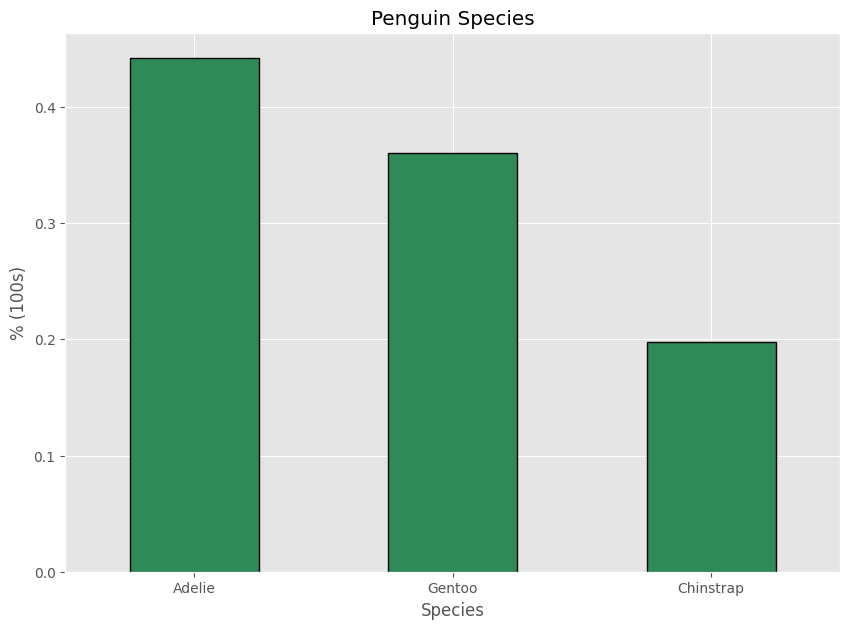

In [9]:
df['species'].value_counts(normalize = True).plot(kind = 'bar', color = 'seagreen', linewidth = 1, edgecolor = 'k')
plt.title('Penguin Species')
plt.xlabel('Species')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

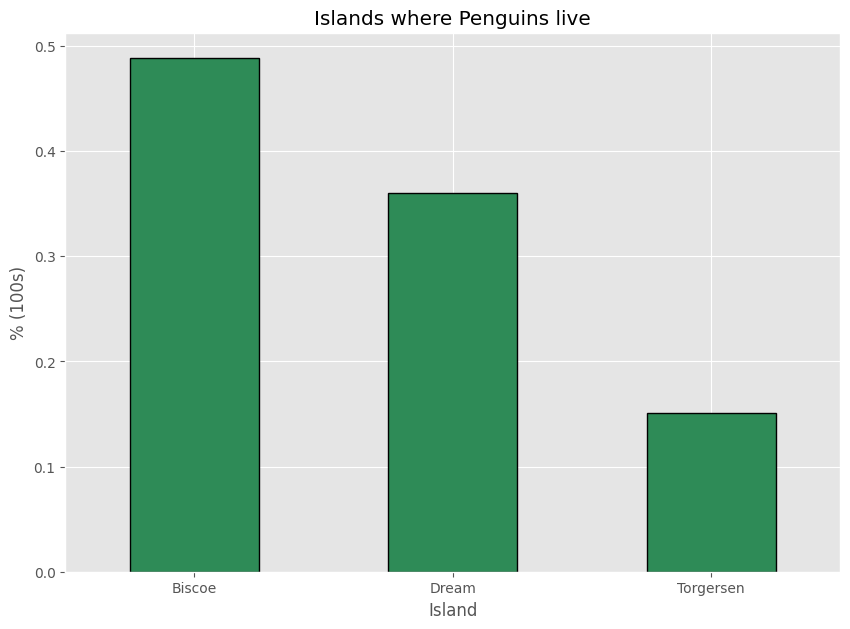

In [10]:
df['island'].value_counts(normalize = True).plot(kind = 'bar', color = 'seagreen', linewidth = 1, edgecolor = 'k')
plt.title('Islands where Penguins live')
plt.xlabel('Island')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

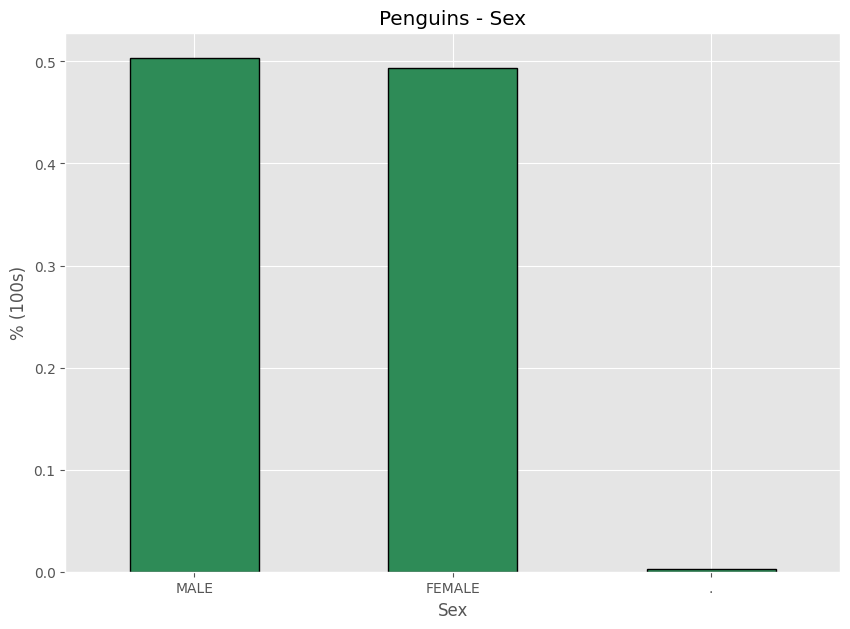

In [11]:
df['sex'].value_counts(normalize = True).plot(kind = 'bar', color = 'seagreen', linewidth = 1, edgecolor = 'k')
plt.title('Penguins - Sex')
plt.xlabel('Sex')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

# Bivariate Analysis

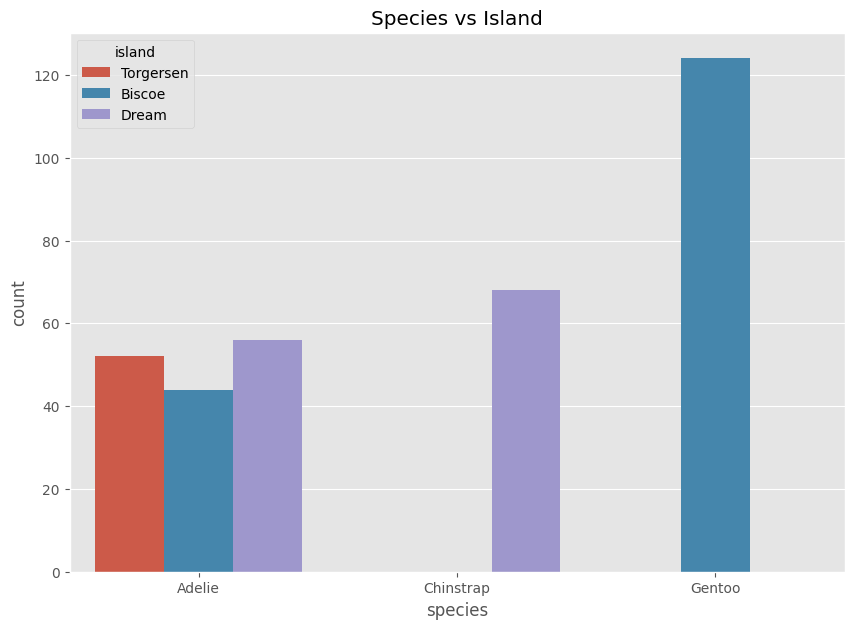

In [12]:
# plot for species vs island
sns.countplot(x = 'species', hue = 'island', data = df)
plt.title('Species vs Island')
plt.show()

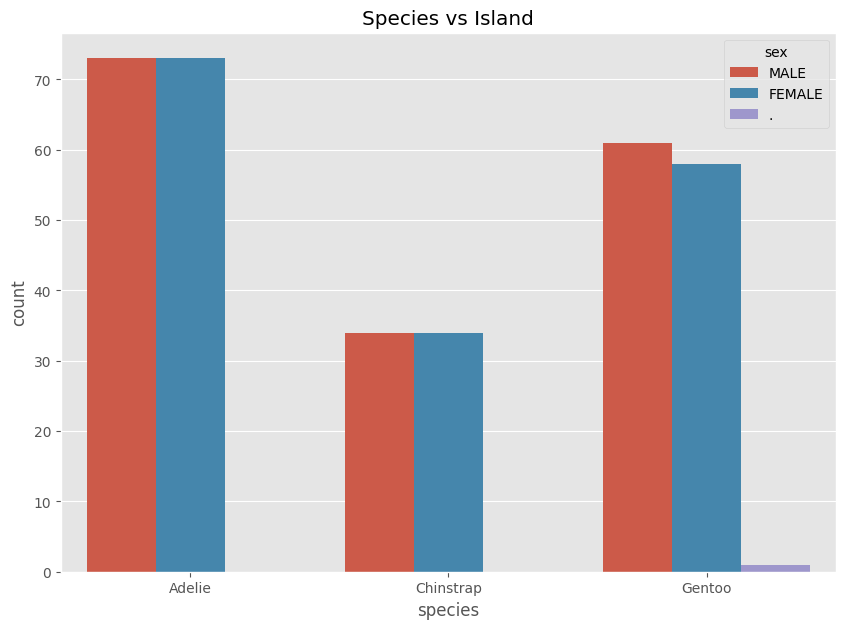

In [13]:
# species vs sex
sns.countplot(x = 'species', hue = 'sex', data = df)
plt.title('Species vs Island')
plt.show()

# Multivariate Analysis

In [14]:
def box(f):
    sns.boxplot(y = f, x = 'species', hue = 'sex',data = df)
    plt.title(f)
    plt.show()

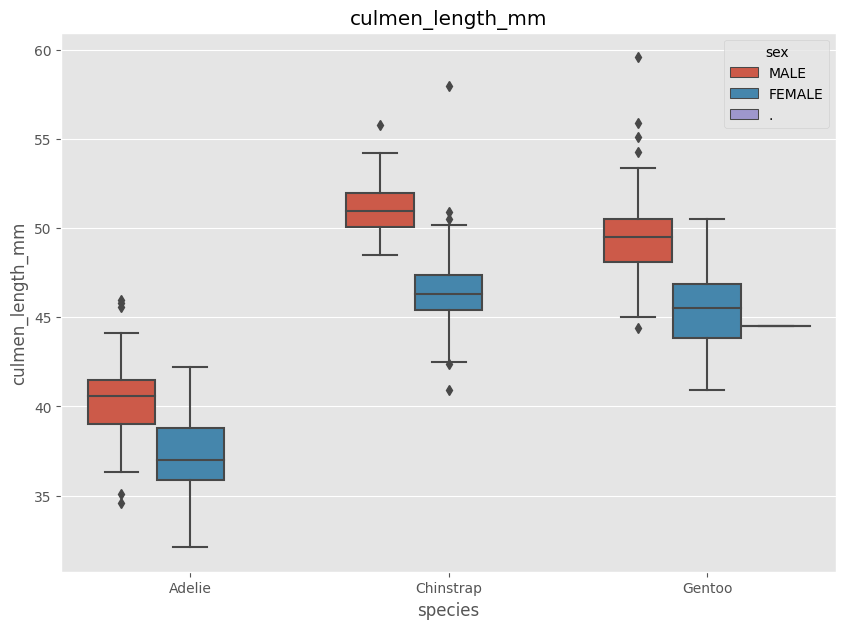

In [15]:
box('culmen_length_mm')

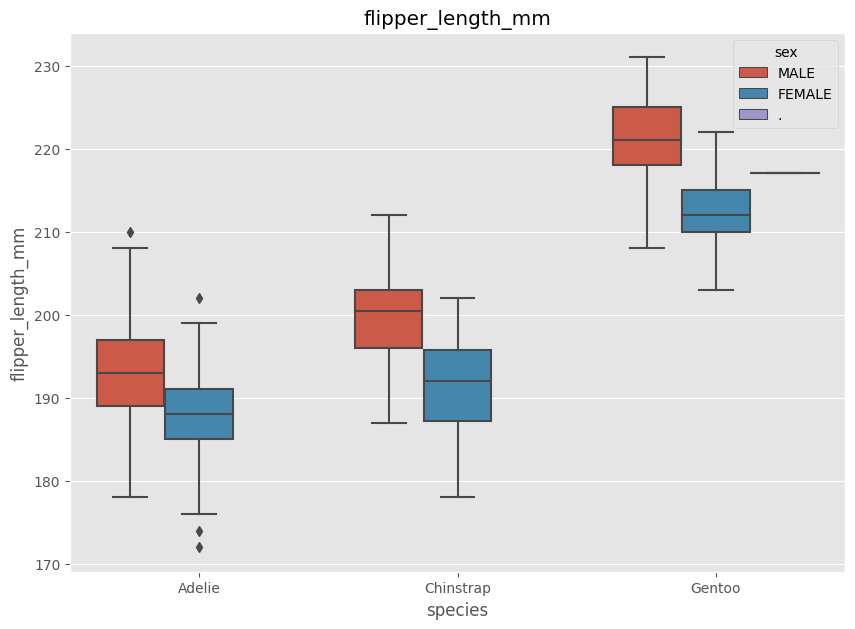

In [16]:
box('flipper_length_mm')

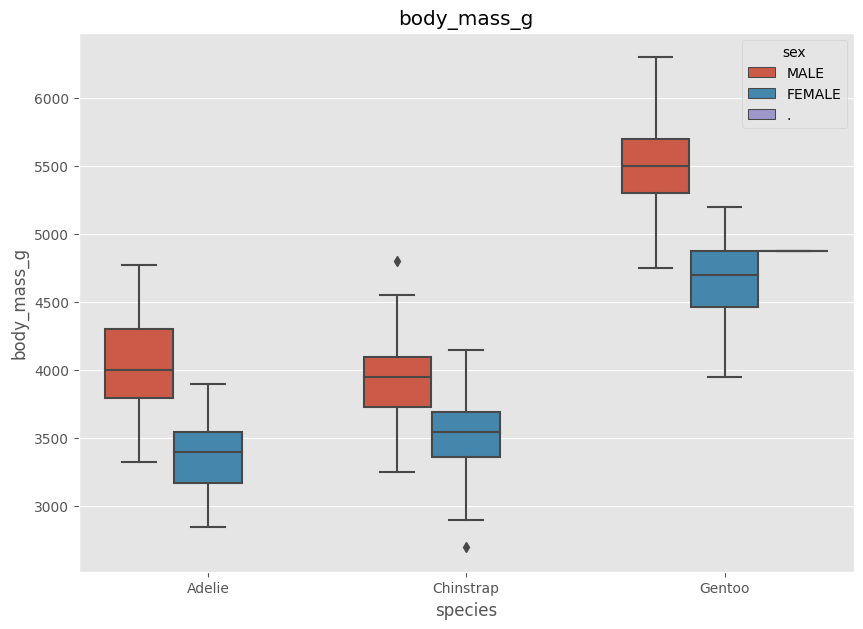

In [17]:
box('body_mass_g')

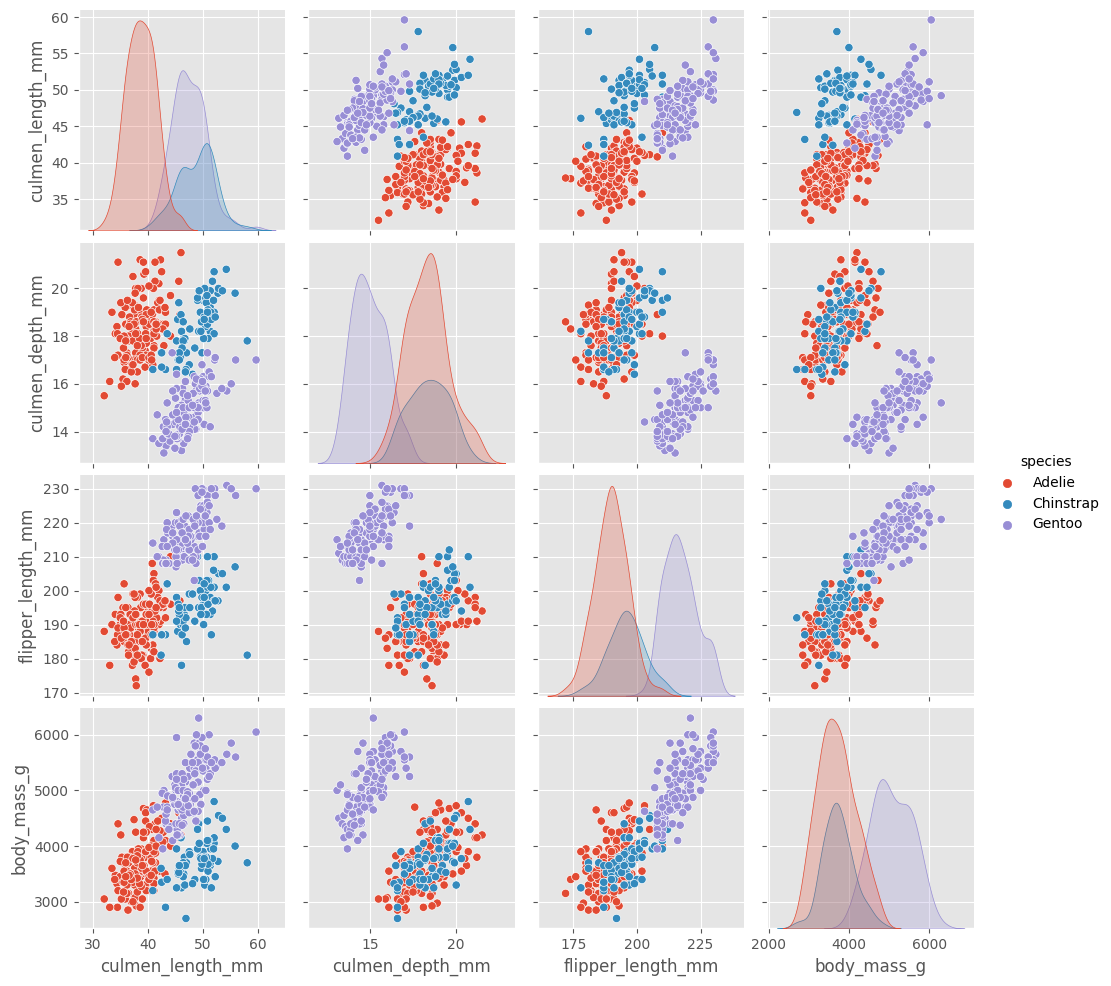

In [18]:
sns.pairplot(df, hue = 'species')
plt.show()

# Checking and handling missing value

In [19]:
original = df.copy()

In [20]:
new_df = original.copy()
# 5. handling the missing values using the mean of the columns
new_df['culmen_length_mm'].fillna(np.mean(original['culmen_length_mm']), inplace = True)
new_df['culmen_depth_mm'].fillna(np.mean(original['culmen_depth_mm']), inplace = True)
new_df['flipper_length_mm'].fillna(np.mean(original['flipper_length_mm']), inplace = True)
new_df['body_mass_g'].fillna(np.mean(original['body_mass_g']), inplace = True)
new_df['sex'].fillna(original['sex'].mode()[0], inplace = True)

In [21]:
new_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [22]:
new_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# outlier handling

In [23]:
#  6. finding and replacing outliers
def outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df.loc[df[col] < lower, col] = lower
    df.loc[df[col] > upper, col] = upper

# replacing outliers
outlier(new_df, 'culmen_length_mm')
outlier(new_df, 'culmen_depth_mm')
outlier(new_df, 'flipper_length_mm')
outlier(new_df, 'body_mass_g')


# Correlation

<AxesSubplot: >

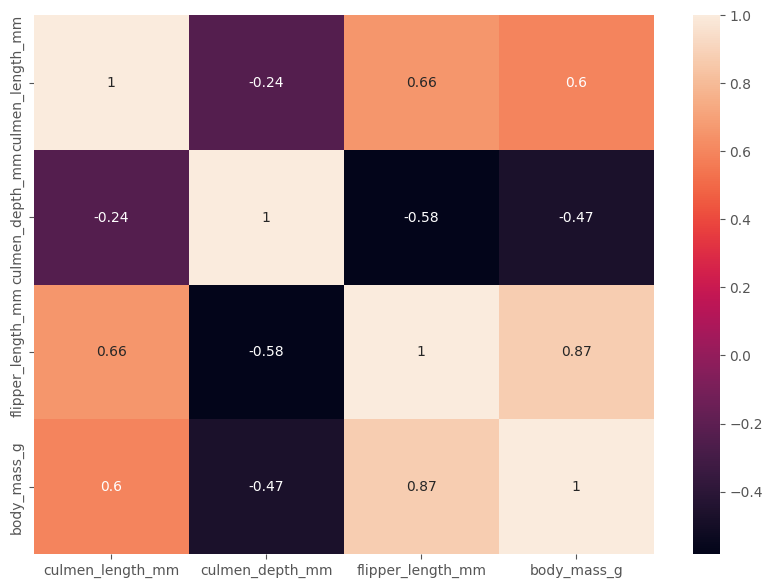

In [24]:
# 7. Check the correlation of independent variables with the target
independent = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
corr = new_df[independent].corr()
corr['body_mass_g'].sort_values(ascending = False)

# correlation heatmap
sns.heatmap(corr, annot = True)


# Data Scaling

In [25]:
# 10. scaling the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [26]:
new_df['culmen_length_mm'] = mms.fit_transform(new_df['culmen_length_mm'].values.reshape(-1, 1))
new_df['culmen_depth_mm'] = mms.fit_transform(new_df['culmen_depth_mm'].values.reshape(-1, 1))
new_df['flipper_length_mm'] = mms.fit_transform(new_df['flipper_length_mm'].values.reshape(-1, 1))
new_df['body_mass_g'] = mms.fit_transform(new_df['body_mass_g'].values.reshape(-1, 1))

new_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,MALE
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,FEMALE
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,FEMALE
3,Adelie,Torgersen,0.429888,0.482282,0.490088,0.417154,MALE
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,FEMALE


# Data Encoding

In [29]:
# 8. encoding the categorical variables
new_df_dummy = pd.get_dummies(new_df, columns = ['sex', 'island'], drop_first = True)
new_df_dummy['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [30]:
new_df_dummy['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)

In [31]:
new_df_dummy.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Dream,island_Torgersen
0,0,0.254545,0.666667,0.152542,0.291667,False,True,False,True
1,0,0.269091,0.511905,0.237288,0.305556,True,False,False,True
2,0,0.298182,0.583333,0.389831,0.152778,True,False,False,True
3,0,0.429888,0.482282,0.490088,0.417154,False,True,False,True
4,0,0.167273,0.738095,0.355932,0.208333,True,False,False,True


<AxesSubplot: >

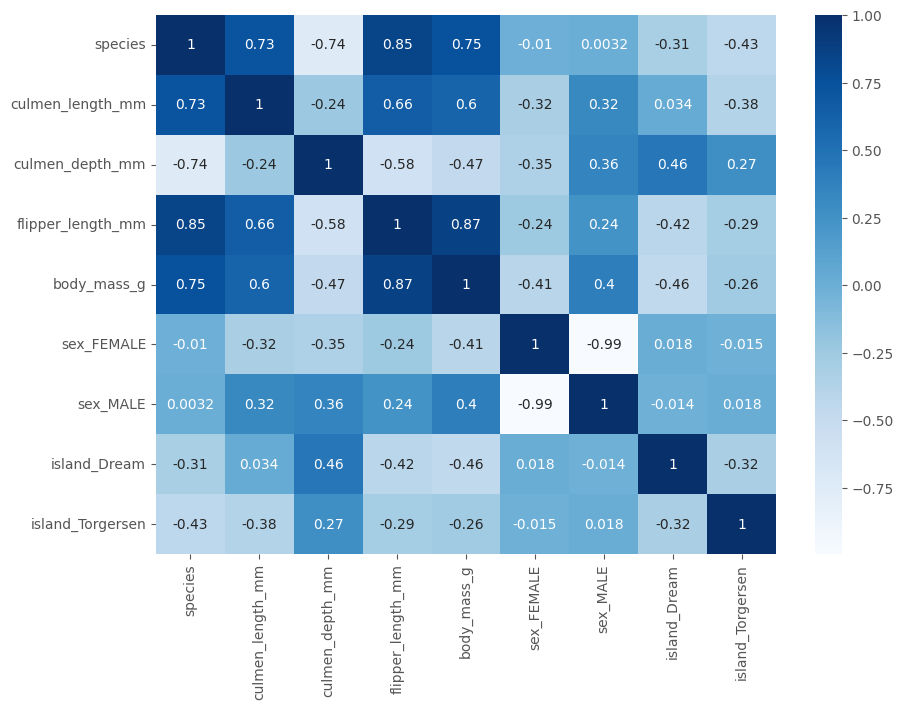

In [32]:
# correltion heatmap for newly encoded dataframe
sns.heatmap(new_df_dummy.corr(), annot = True, cmap = 'Blues')

# Independent and Dependent Variable Split

In [33]:
# 9. split the data into dependent and independent variables
X = new_df_dummy.drop(columns = ['species', 'sex_FEMALE', 'sex_MALE'])
Y = new_df_dummy['species']

# Training and Testing Data Split

In [34]:
# 11. split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

# Shape of training and testing Data

In [35]:
# 12. Checking the traing and testing data shape
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)


X_train:  (258, 6)
X_test:  (86, 6)
Y_train:  (258,)
Y_test:  (86,)
